Question 1: Consider the iris data file seeds.csv. 
A. Import the file to python
B. Perform pre processing
C. Divide the data set in 80% training and 20% testing
D. Select the Simple Dense Neural Network
E. Perform the training of the model
F. Test the model with test data
G. Evaluate the performance of your model


In [58]:
import pandas as pd
# used to read the data set
import numpy as np
# used to do some operations with the arrays
import os
# used handle some files


In [59]:
df = pd.read_csv("Iris.csv")

In [60]:
df = pd.read_csv("Iris.csv")

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
df.head(100)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,1
96,97,5.7,2.9,4.2,1.3,1
97,98,6.2,2.9,4.3,1.3,1
98,99,5.1,2.5,3.0,1.1,1


In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X = df.drop(columns = ['Species'])
Y = df['Species']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)

In [64]:
from keras.models import Sequential
from keras.layers import Dense

In [65]:
model = Sequential()
model.add(Dense(64, input_dim=5, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='sigmoid'))


In [66]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

# Train the model on the training data
history=model.fit(X_train, Y_train, epochs=50, batch_size=16)

Epoch 1/50
8/8 [==============================] - 0s 2ms/step - loss: 1.2324 - accuracy: 0.3333
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.3250
Epoch 3/50
8/8 [==============================] - 0s 2ms/step - loss: 0.5355 - accuracy: 0.3417
Epoch 4/50
8/8 [==============================] - 0s 2ms/step - loss: 0.5321 - accuracy: 0.3500
Epoch 5/50
8/8 [==============================] - 0s 2ms/step - loss: 0.5073 - accuracy: 0.3583
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 0.4700 - accuracy: 0.3417
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 0.4441 - accuracy: 0.3250
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: 0.4231 - accuracy: 0.3333
Epoch 9/50
8/8 [==============================] - 0s 2ms/step - loss: 0.4127 - accuracy: 0.4167
Epoch 10/50
8/8 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.2667
Epoch 11/50
8/8 [======================

In [67]:
maoo=model.predict(X_test)

In [68]:
maoo

array([[0.9994883 , 0.99939483, 0.99965584],
       [0.99991953, 0.9999612 , 0.99997014],
       [0.00865465, 0.01254064, 0.00802669],
       [0.00145057, 0.00360489, 0.00197303],
       [0.97128814, 0.9748182 , 0.9805206 ],
       [0.05287418, 0.05319008, 0.04586688],
       [0.9997649 , 0.99989814, 0.99990463],
       [0.9996415 , 0.9997926 , 0.9998235 ],
       [0.82016504, 0.72919893, 0.7517279 ],
       [0.9952133 , 0.9979514 , 0.9980292 ],
       [0.00107172, 0.002581  , 0.00133741],
       [0.99995506, 0.99998116, 0.9999839 ],
       [0.06337336, 0.08098328, 0.06770509],
       [0.00126413, 0.00462309, 0.00267673],
       [0.99598026, 0.9969621 , 0.99784815],
       [0.9961648 , 0.99692756, 0.99785066],
       [0.99990594, 0.9999386 , 0.9999558 ],
       [0.99991167, 0.99996436, 0.9999684 ],
       [0.9993619 , 0.9996517 , 0.99969524],
       [0.999768  , 0.99985456, 0.99989223],
       [0.01979131, 0.02404976, 0.01857996],
       [0.99907756, 0.99901813, 0.99940526],
       [0.

In [69]:
Y_test

108    2
137    2
22     0
9      0
79     1
29     0
121    2
113    2
54     1
98     1
16     0
143    2
35     0
1      0
96     1
94     1
135    2
139    2
106    2
124    2
32     0
103    2
19     0
125    2
31     0
34     0
64     1
76     1
93     1
20     0
Name: Species, dtype: int32

In [70]:
from matplotlib import pyplot

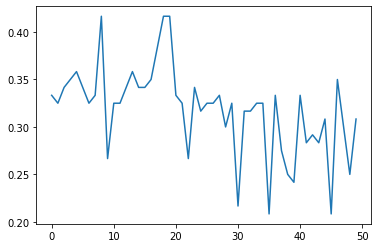

In [71]:
pyplot.plot(history.history['accuracy'])

In [72]:
y_pred_bool = np.argmax(maoo, axis=1)

In [73]:
y_pred_bool

array([2, 2, 1, 1, 2, 1, 2, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 2, 0, 2, 1], dtype=int64)

In [74]:
from sklearn.metrics import classification_report, confusion_matrix

In [75]:
print(classification_report(Y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00         8
           2       0.65      1.00      0.79        11

    accuracy                           0.37        30
   macro avg       0.22      0.33      0.26        30
weighted avg       0.24      0.37      0.29        30

